## Gray-Scott reaction–diffusion equation

Here we study pattern formation in a reaction diffusion system. The reaction we are modeling is 
$$
u + 2v \rightarrow 3v
$$
Gray-Scott reaction-diffusion equation is used to model the reaction
$$
\frac{\partial u}{\partial t} = \underbrace{D_u \boldsymbol\nabla^2 u}_{\substack{\text{diffuse }u\\\text{ for concentration to spread}}} - \underbrace{uv^2}_{\text{probability of reaction}} + \underbrace{F(1-u)}_{\substack{\text{add more of u }  \\\text{with a bound 1}}}
$$
$$
\frac{\partial v}{\partial t} = \underbrace{D_v \boldsymbol\nabla^2 v}_{\substack{\text{diffuse }v\\\text{ for concentration to spread}}} + \underbrace{uv^2}_{\text{probability of reaction}} - \underbrace{(F+K)v}_{\substack{\text{remove } v \text{ from reaction}  \\\text{  with a bound 0}}}
$$

The system shows very rich set of patterns as the parameters for equations are varied.

In [1]:
%matplotlib inline
import pymaft
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import spdiags 



class GrayScott():
    """Class to solve Gray-Scott Reaction-Diffusion equation"""
    def __init__(self, N):
        self.N = N
        self.u = np.ones((N, N), dtype=np.float128)
        self.v = np.zeros((N, N), dtype=np.float128)
    
    
    def laplacian(self, st, h):
        """Construct Laplacian using PyMAFT"""
        N, st, h = self.N, st, h
        fd  = pymaft.dms.FD(N, st, h)
        D22 =fd.diffmat(2);  I=sp.sparse.identity(N)
        Laplacian = sp.sparse.kron(D22, I) + sp.sparse.kron(I, D22)
        return Laplacian


    def initialise(self):
        """Setting up the initial condition"""
        N, N2, r = self.N, np.int(self.N/2), 16
        
        self.u += 0.02*np.random.random((N,N))
        self.v += 0.02*np.random.random((N,N))
        
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return  

    
    def integrate(self, Nt, Du, Dv, F, K):
        """Integrate the resulting system of equations using the Euler method"""
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))
        Laplacian=self.laplacian(5, 1)

        #evolve in time using Euler method
        for i in range(Nt):
            uvv = u*v*v
            u += (Du*Laplacian*u - uvv +  F *(1-u))
            v += (Dv*Laplacian*v + uvv - (F+K)*v  )
        
        self.u = u
        self.v = v
        return
        
    
    def configPlot(self):
        """Plotting business"""
        u = self.u
        v = self.v
        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='k');
        sp =  f.add_subplot(1, 2, 1 );
        plt.pcolor(u.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')

        sp =  f.add_subplot(1, 2, 2 );
        plt.pcolor(v.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')
        plt.show()

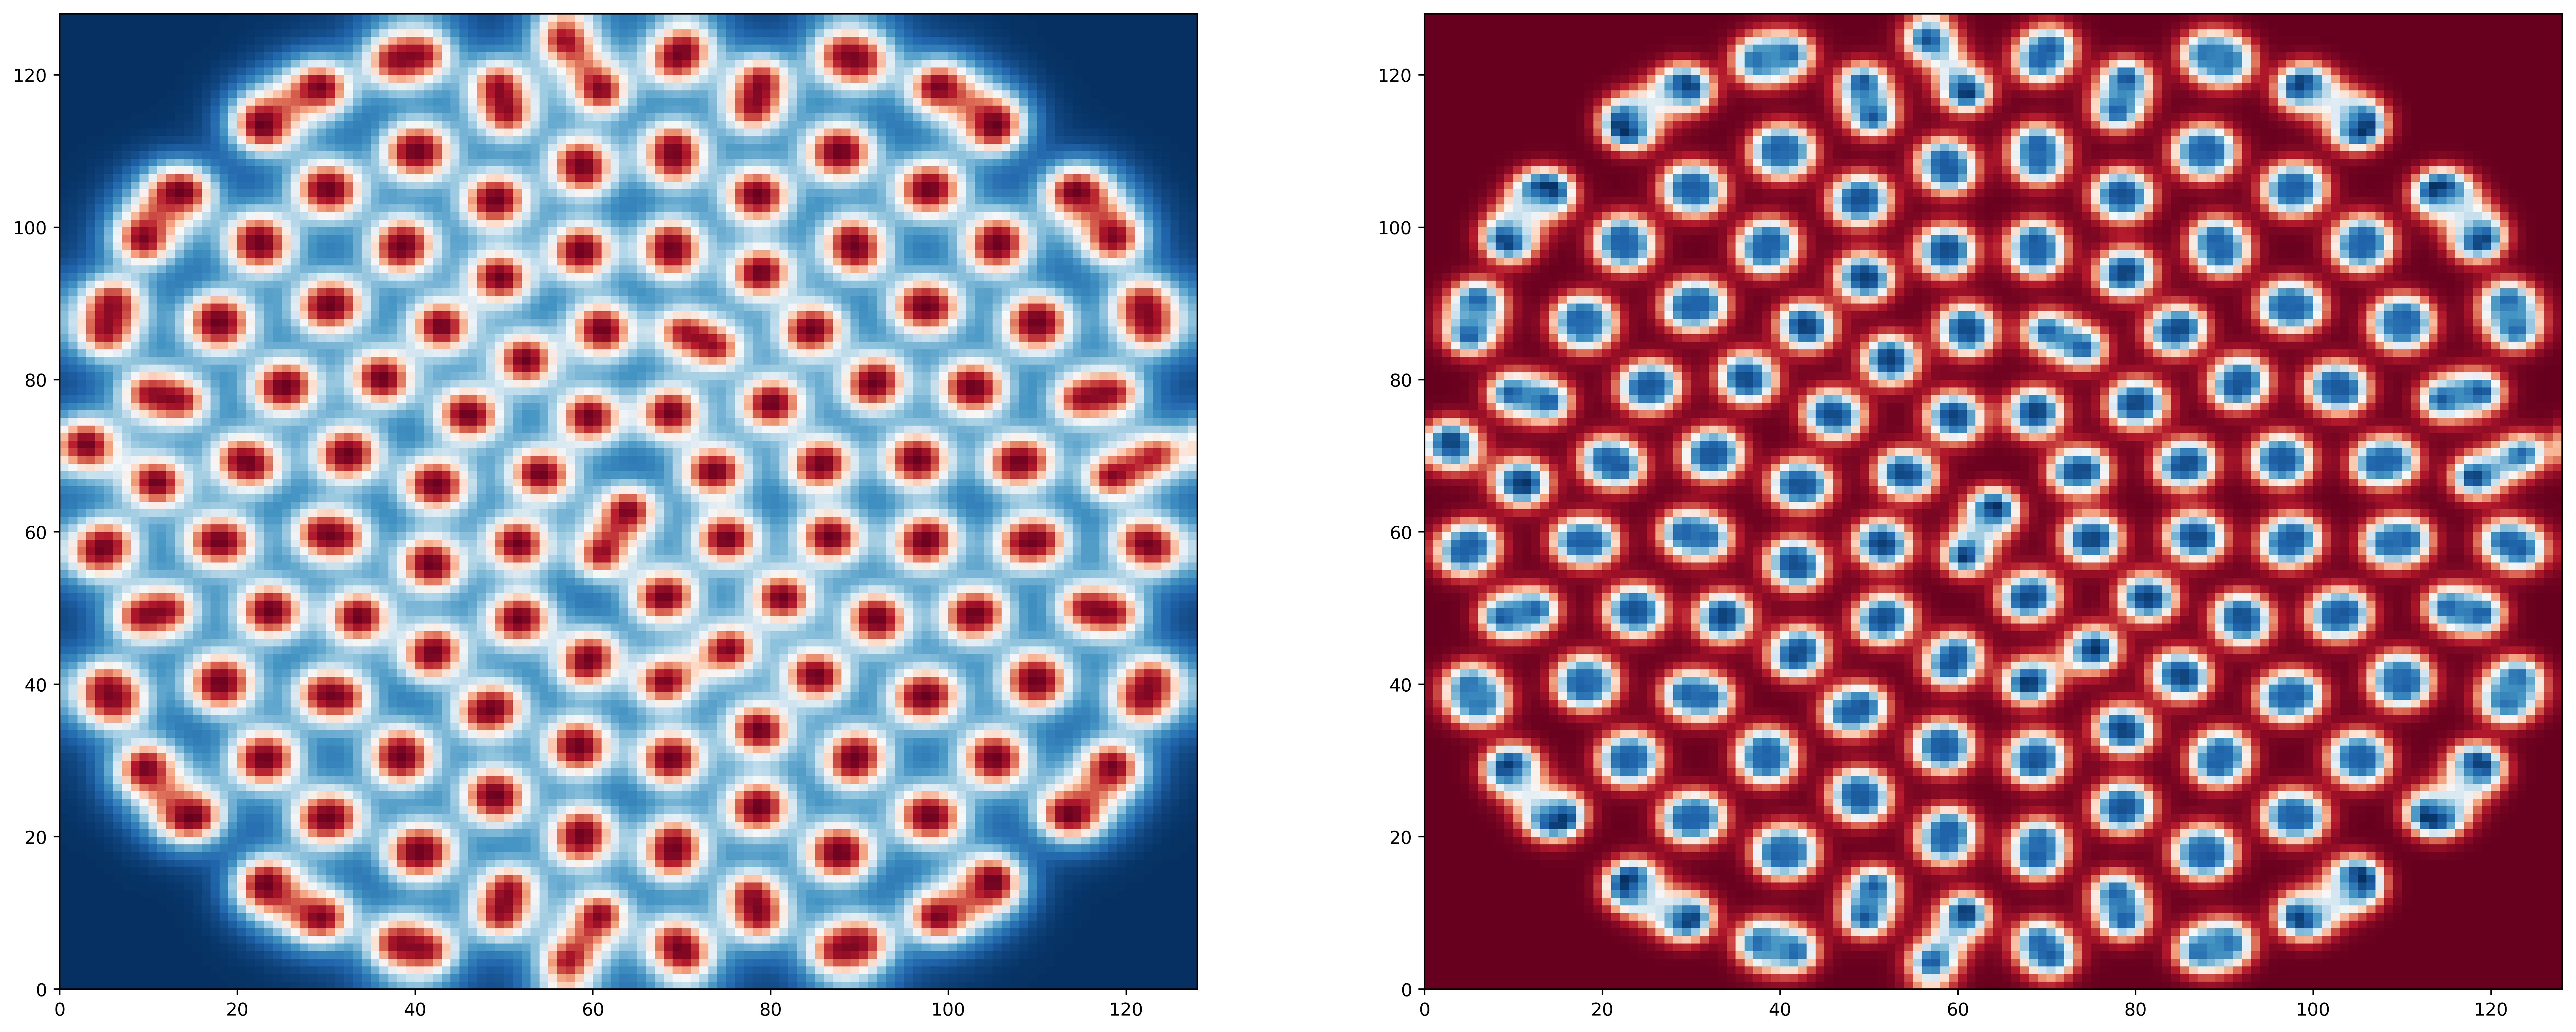

In [2]:
N = 128
rdSolver = GrayScott(N)
Du, Dv, F, K = 0.14, 0.06, 0.035, 0.065
Nt = 4000 

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K)
rdSolver.configPlot()

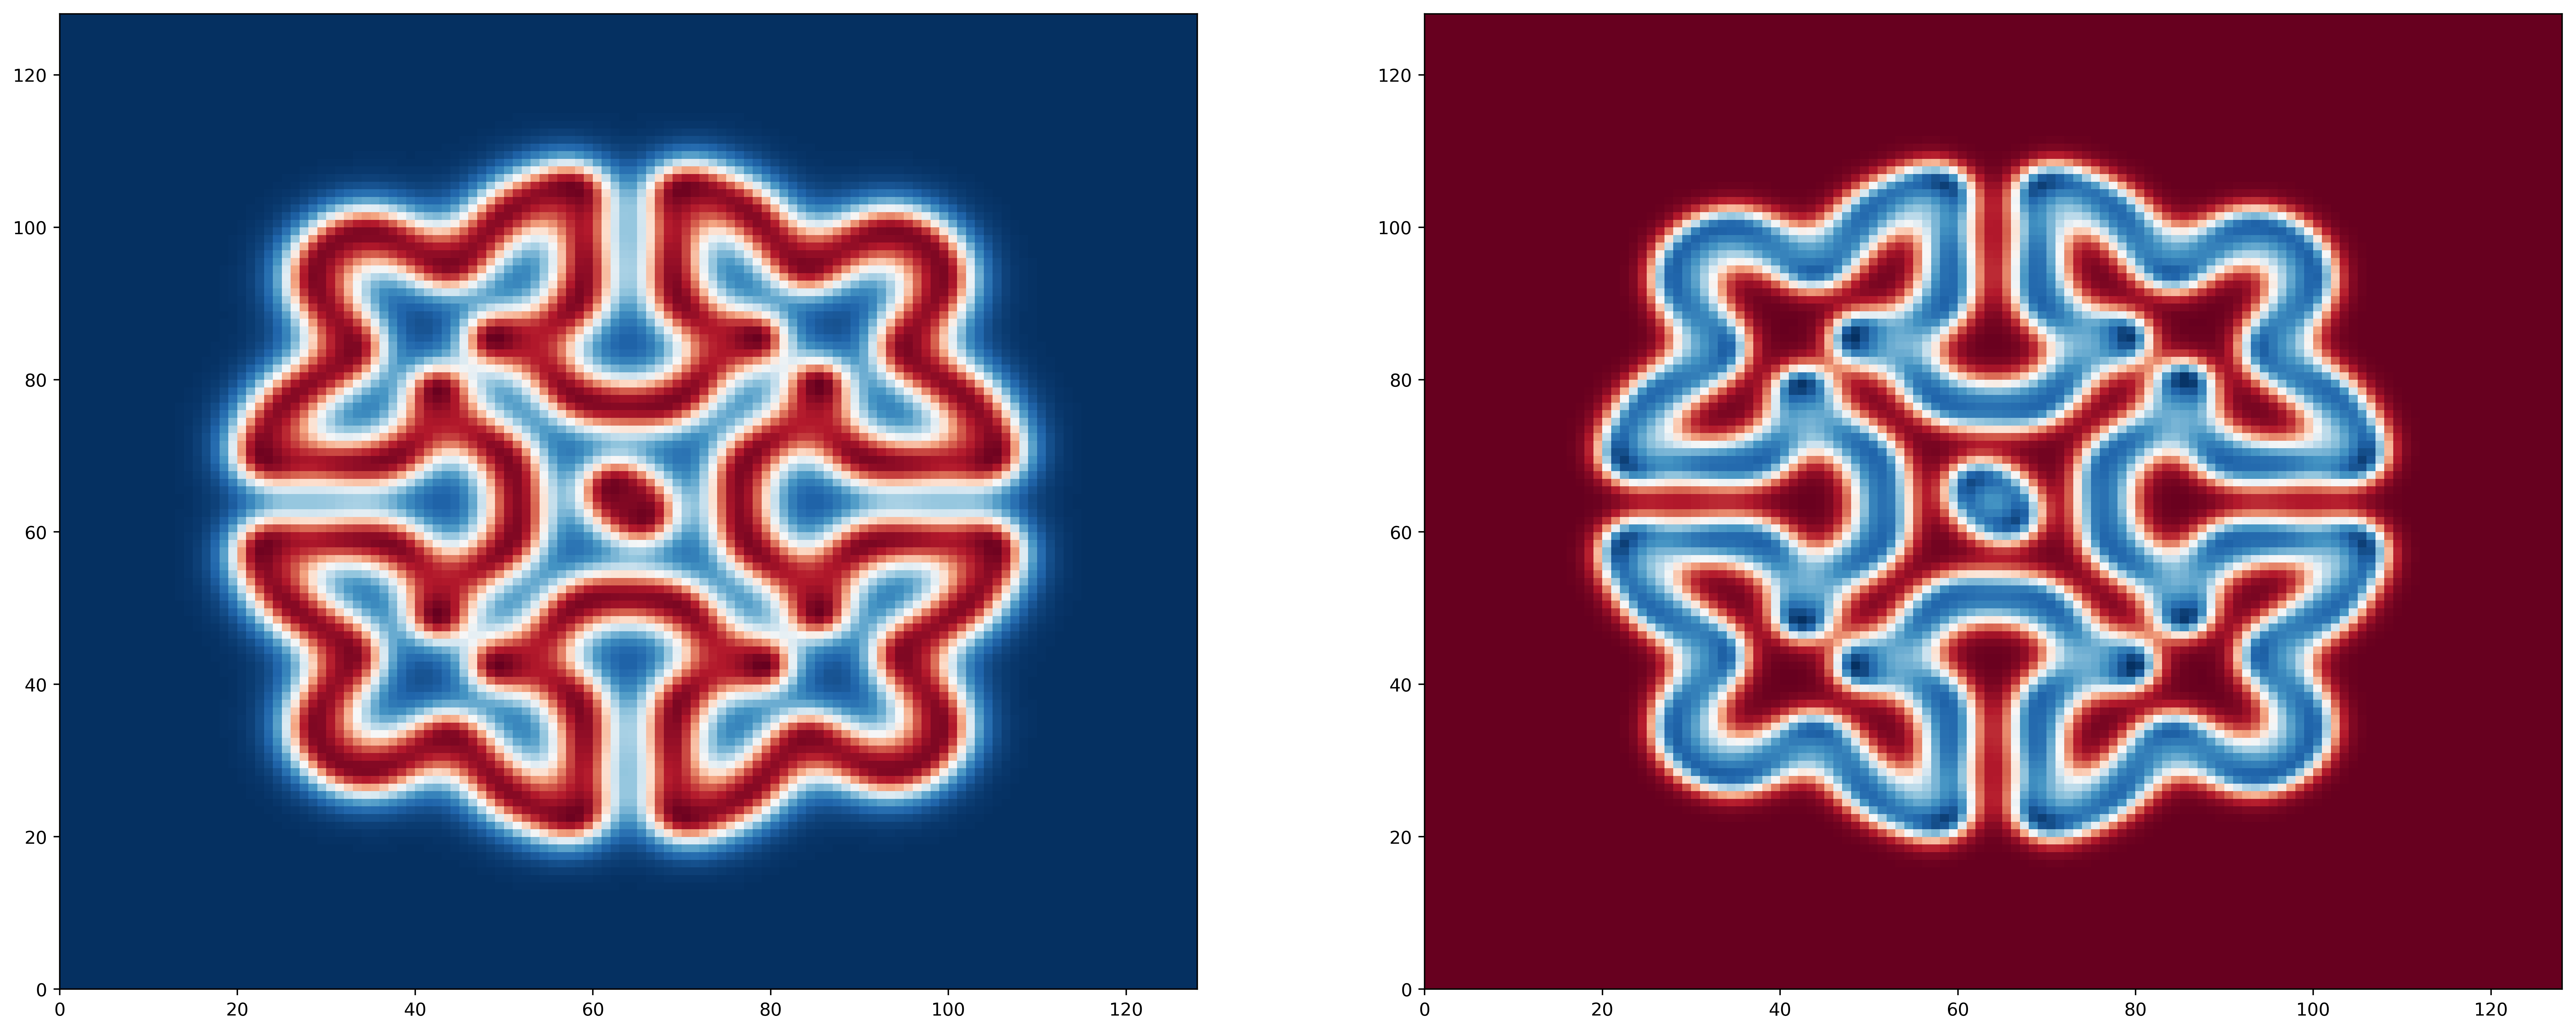

In [3]:
N = 128
rdSolver = GrayScott(N)
Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062 
Nt = 4000 

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K)
rdSolver.configPlot()

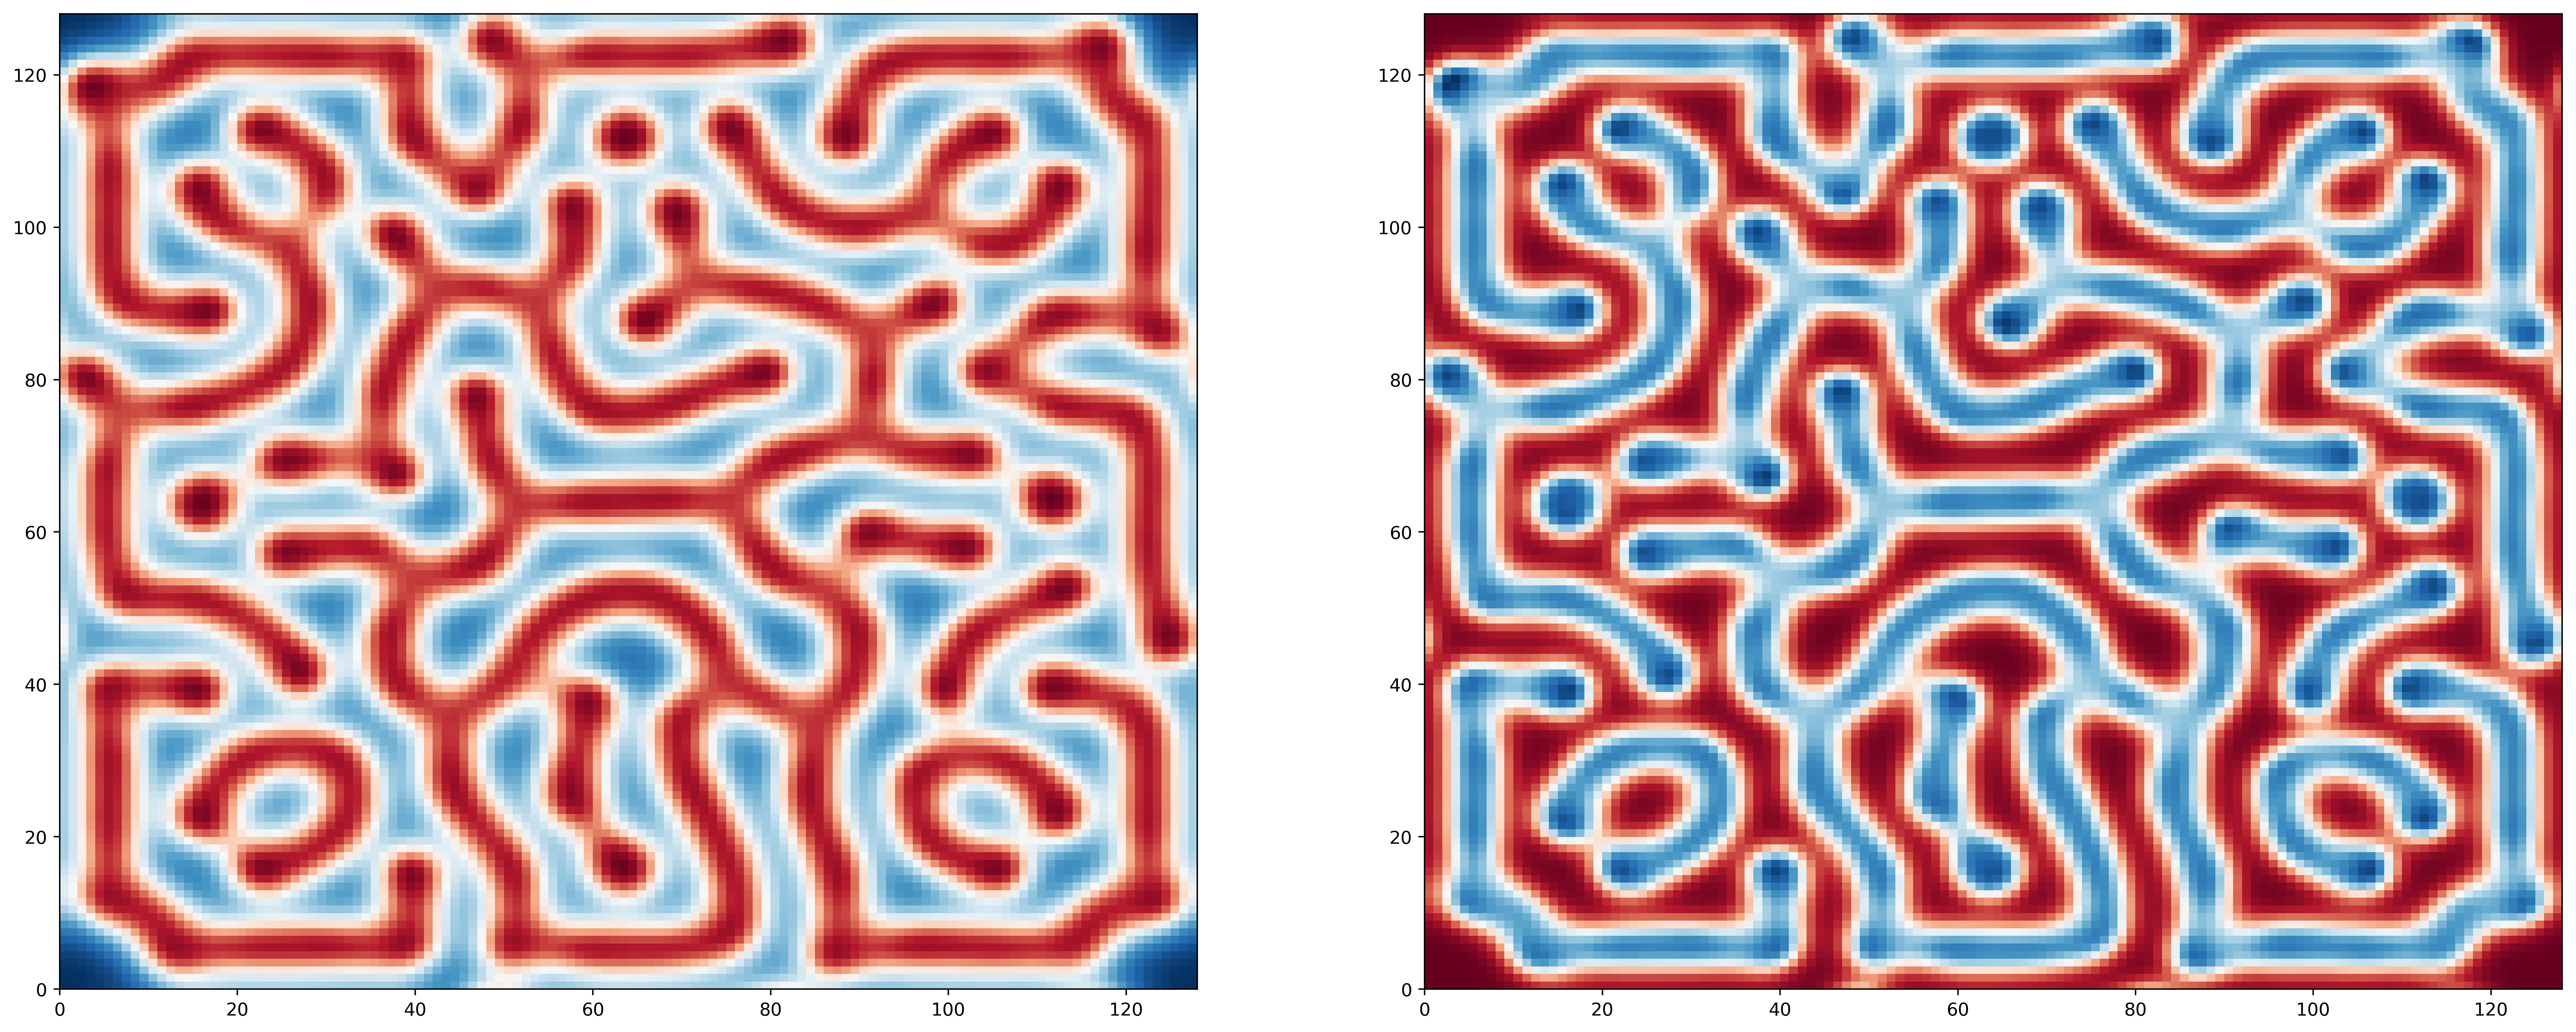

In [4]:
N = 128
rdSolver = GrayScott(N)
Du, Dv, F, K = 0.16, 0.08, 0.035, 0.060
Nt = 4000 

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K)
rdSolver.configPlot()